In [61]:
import os
import cv2
import numpy as np
import pandas
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [62]:
def read_file(filename):
    path = cv2.imread(filename)
    path = cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
    plt.imshow(path)
    plt.show()
    return path

In [63]:
filename = "/content/20210314_184121.jpg"

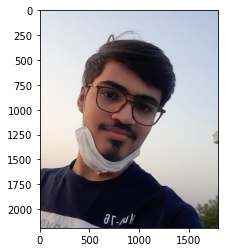

In [64]:
img = read_file(filename)

In [65]:
def edge_mask(img,line_size,blur_value):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray = cv2.medianBlur(gray,blur_value)
  # gray = gray.astype(np.float16)
  edges = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)

  return edges

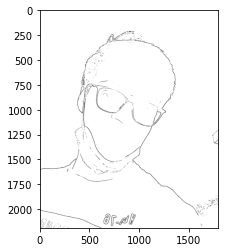

In [66]:
line_size,blue_value = 7,7
edges = edge_mask(img,line_size,blue_value)
plt.imshow(edges,cmap="gray")
plt.show()

In [67]:
def color_quanitisization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  #implementing k-means

  ret, label, center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

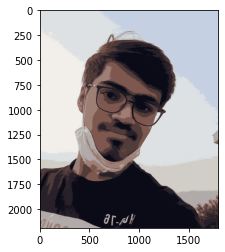

In [68]:
img = color_quanitisization(img,k=10)
plt.imshow(img)
plt.show()

**Reduce Noise**

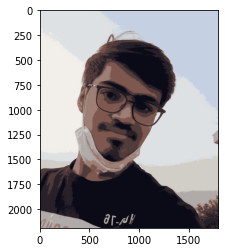

In [69]:
blurred = cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [70]:
def cartoon(blurred):
  c = cv2.bitwise_and(blurred,blurred,mask=edges)

  plt.imshow(c)
  plt.show()

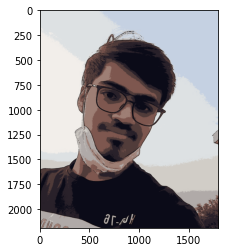

In [71]:
cartoon(blurred)